## 12-2 파이썬으로 그래프를 그린다는건?

준비물
___
$ pip install matplotlib 
$ pip install seaborn

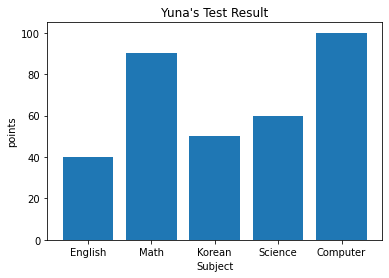

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel("Subject")
plt.ylabel("points")
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png') # 그래프를 이미지로 출력
plt.show()

- %matplotlib inline 은 Ipython에서 사용하는 매직 메소드 Rich output에 대한 표현 방식
- 그림, 소리, 애니메이션 과 같은 결과물을 Rich output 이라고 함

참고사이트 https://studymake.tistory.com/601
___
### 2. 축 그리기
___
그래프를 그리는 순서는 우선 하나의 그림(figure)객체를 만들고 그 안에 하위 그래프(subplot)을 추가합니다.


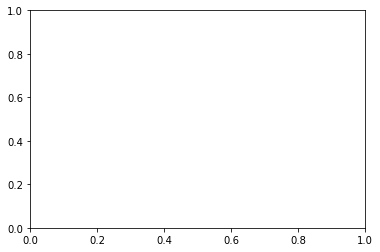

In [2]:
# 축 그리기 (하나의 그림 객체를 만드는 코드)
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)

만약 fig = plt.figure() 만 입력한다면

In [3]:
fig = plt.figure() 

<Figure size 432x288 with 0 Axes>

축이 없어 그려지는 것이 없지만 figure 객체가 생성되었습니다.   
   
figure()라는 객체는 도화지(그래프)입니다. 이 figure()객체에 add_subplot 메소드를 이용해 축을 그린다.   
figsize인자값을 주어 그래프의 크기를 정할 수 있음

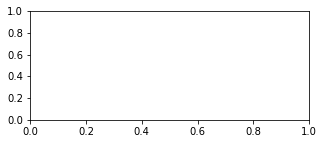

In [4]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

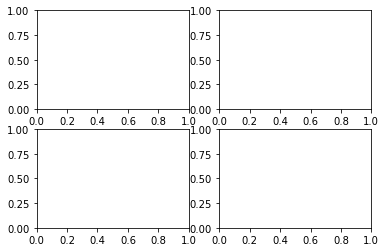

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

## 3. 그래프 그리기
___
bar() 메소드를 이용해 막대그래프를 그릅니다. 그리고 인자에 위에서 정의한 데이터들을 x,y순으로 넣어 줍니다.

Text(0.5, 1.0, "Yuna's Test Result")

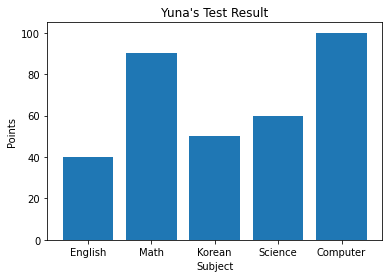

In [7]:
# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

## 12-4. 간단한 그래프 그리기(2) 선 그래프 그려보기

matplotlib을 이용해 선(line) 그래프를 그려보겠습니다.

__1. 데이터 정의__
___
모듈 import 하고 그래프로 그릴 데이터를 정의

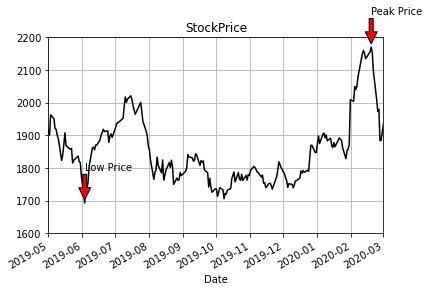

In [11]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터

csv_path = os.getenv("HOME") + "/workplace/sba_project/aiffel/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col =0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d) +10),
                xytext=(d,price.asof(d)+100),
                arrowprops=dict(facecolor='red'))
    
# 그리드, 타이틀 달기
plt.grid()
ax.set_title("StockPrice")

# 보여주기
plt.show()

__Pandas Series 데이터 활용__
   
Pandas의 Series는 선 그래프를 그리기에 최적의 자료구조를 갖추고 있습니다.  
위 예시코드는 price = data['Close']가 바로 pandas의 series입니다.   
price.plot(ax=ax,  style = 'black') 에서 pandas의 plot을 사용하면서, matplotlib에서 정의한 subplot 공간 ax 를 사용한 것을 알 수 있습니다.   
   
__좌표축 설정__    
plt.xlim(), plt.ylim()을 통해 x, y 좌표축의 적당한 범위를 설정해 줄 수 있습니다.   
   
__주석__   
그래프 안에 추가적으로 글자나 화살표 등 주석을 그릴 때는 annotate() 메소드를 이용합니다.   
주석달기는 그래프 그리기의 고급 기법입니다.   
   
__그리드__   
grid() 메소드를 이용하면 그리드(격자눈금)를 추가 할 수 있어요
  

## 12-5 간닪나 그래프 그리기(3) plot 사용법 상세
___
위에서 figure() 객체를 생성하고 add_subplot() 으로 서브 플롯을 생성하며 plot을 그린다고 했습니다.   
이 2가지 과정을 생략할 수 도 있는데요. plt.plot() 명령으로 그래프를 그리면 matplotlib은 가장 최근의 figure객ㅊ와 그 서브플롯을 그립니다.   
서브 플롯이 없다면, 새로 하나 생성합니다.   
   
plt.plot() 의 인자로 x데이터, y데이터, 마커옵션, 색상 등의 인자를 이용할 수 있고

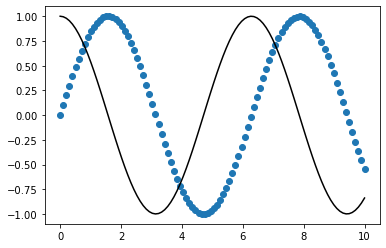

In [12]:
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '-', color='black')
plt.show()

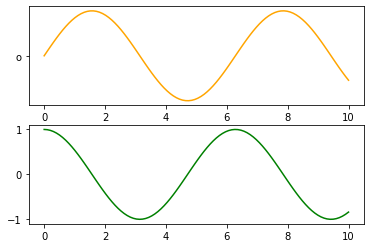

In [16]:
x = np.linspace(0,10,100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'green')

## linestyle, marker 옵션
___
라인 스타일은 Plot()의 인자로 들어가는데 아래와 같이 다양한 방법으로 표기 할 수 있습니다.

In [ ]:
x = np.linspace(0, 10, 100)

plt.plot(x, x+0, linestyle = 'solid')
plt.plot(x, x+1, linestyle = 'dashed')
plt.plot(x, x+2, linestyle = 'dashdot')
plt.plot(x, x+3, linestyle = 'dotted')
plt.plot(x, x+0, 'g')
plt.plot(x, x+1, '--c')